In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jun 11 12:55:24 2023

@author: Al-Ikhwan
"""

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jun  4 21:59:36 2023

@author: abdullahalbinsaleh
"""

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 20 06:20:43 2023

@author: abdullahalbinsaleh

This version uses normal random data splitting technique 
"""

#-------------------------import librarires-------------------------#
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

#-------------------------Load dataset-------------------------#
moneyFlow = pd.read_excel("moneyFlow.xlsx")
moneyFlow.drop('Unnamed: 0', axis=1, inplace=True)
#-------------------------Data Exploration-------------------------#
moneyFlow.head()
moneyFlow.info()
moneyFlow.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183504 entries, 0 to 183503
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           183504 non-null  datetime64[ns]
 1   Time           183504 non-null  object        
 2   Ticker         183504 non-null  object        
 3   Expiration     183504 non-null  datetime64[ns]
 4   Strike         183504 non-null  float64       
 5   C/P            183504 non-null  object        
 6   Spot           183504 non-null  float64       
 7   Details        183504 non-null  object        
 8   Type           183504 non-null  object        
 9   Prem           183504 non-null  float64       
 10  Sentiment      183504 non-null  object        
 11  Execution      183504 non-null  object        
 12  Open Interest  183504 non-null  int64         
 13  Volume         183504 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(7

Index(['Date', 'Time', 'Ticker', 'Expiration', 'Strike', 'C/P', 'Spot',
       'Details', 'Type', 'Prem', 'Sentiment', 'Execution', 'Open Interest',
       'Volume'],
      dtype='object')

In [3]:


#-------------------------Data Preparation & Pre-Processing-------------------------#
#drop $ sign from Spot feature 
# convert the 'Spot' column to a string
moneyFlow['Spot'] = moneyFlow['Spot'].astype(str)
moneyFlow['Spot'] = moneyFlow['Spot'].str.replace("$", "")

# convert the 'Spot' column back to float
moneyFlow['Spot'] = moneyFlow['Spot'].astype(float)


#Split Details feature into two features 
moneyFlow[["Size", "Price"]] = moneyFlow["Details"].str.split("@", expand=True)

#drop the Details feature 
moneyFlow.drop(columns=["Details"], inplace=True)

#Find options duration in days 
moneyFlow["Date"] = pd.to_datetime(moneyFlow["Date"])
moneyFlow["Expiration"] = pd.to_datetime(moneyFlow["Expiration"])
moneyFlow["Duration"] = (moneyFlow["Expiration"]-moneyFlow["Date"]).dt.days

#drop the Date, Expiration, and Time Featuers 
moneyFlow.drop(columns=["Time", "Date", "Expiration", "Ticker"], inplace=True)


#Convert categoircal variables into dummy variables 
moneyFlow = pd.get_dummies(moneyFlow, columns=["Type", "Execution", "C/P"])

#Drop missing values 
moneyFlow.dropna(inplace=True)


#-------------------------Feature Selection-------------------------#
# Separate features and target variable

moneyFlow = moneyFlow[moneyFlow['Sentiment'] != 'NEUTRAL']



C:\Users\JBarr\AppData\Local\Temp\ipykernel_78540\2289184336.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  moneyFlow['Spot'] = moneyFlow['Spot'].str.replace("$", "")


In [4]:
moneyFlow = moneyFlow.iloc[:100000]

In [5]:
moneyFlow.shape

(100000, 18)

In [6]:

#-------------------------Feature Selection-------------------------#
# Separate features and target variable
X = moneyFlow.drop("Sentiment", axis=1)
y = moneyFlow["Sentiment"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:


# Overfitting tip 

# There is no need for data scaling if we are using decision trees and random forests as they are not sensitive to scale of input
#  this method using random forest might be selecting too many features, leading to a complex model that could overfit.
classifier = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)


# Initialize RFECV with the classifier
rfecv = RFECV(estimator=classifier, step=1, cv=5)

# Perform feature selection
X_selected = rfecv.fit_transform(X_scaled, y)


# Print the selected features
selected_features = X.columns[rfecv.support_]
print("Selected Features:")
print(selected_features)


KeyboardInterrupt: 

In [10]:

#assign selected features using RFE to X
X = moneyFlow[['Strike', 'Spot', 'Open Interest', 'Size', 'Price', 'Duration',
       'Type_SWEEP', 'Execution_ABOVE ASK', 'Execution_AT ASK',
       'Execution_AT BID', 'Execution_AT MIDPOINT', 'Execution_BELOW BID',
       'C/P_CALL', 'C/P_PUT']]


KeyboardInterrupt: 

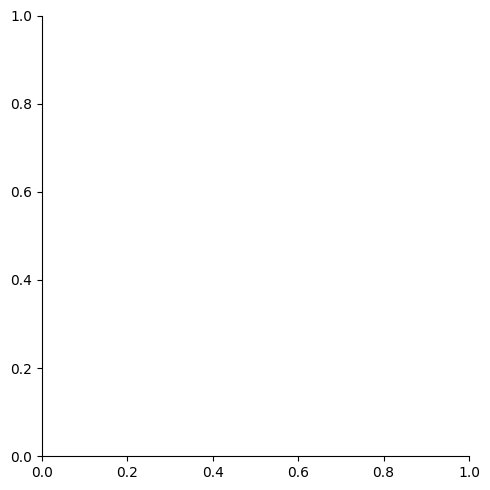

In [11]:
import seaborn as sns
df = moneyFlow.reset_index().melt('index', var_name='cols',  value_name='vals')
g = sns.catplot(x="index", y="vals", hue='cols', data=moneyFlow, kind='point')

In [ ]:
[['Strike', 'Spot', 'Open Interest', 'Size', 'Price', 'Duration',
       'Type_SWEEP', 'Execution_ABOVE ASK', 'Execution_AT ASK',
       'Execution_AT BID', 'Execution_AT MIDPOINT', 'Execution_BELOW BID',
       'C/P_CALL', 'C/P_PUT']]

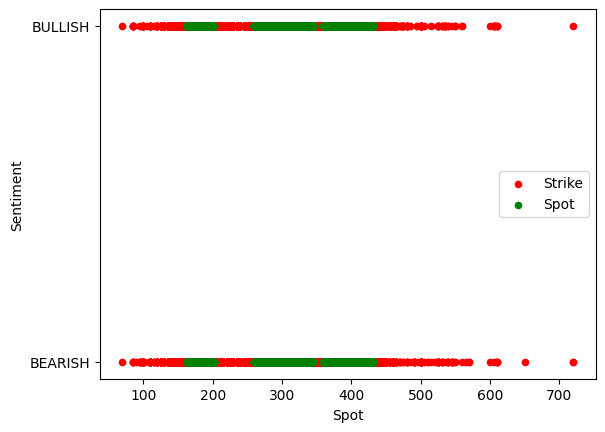

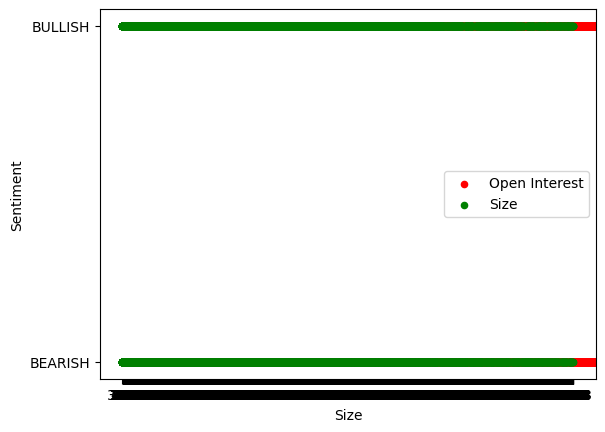

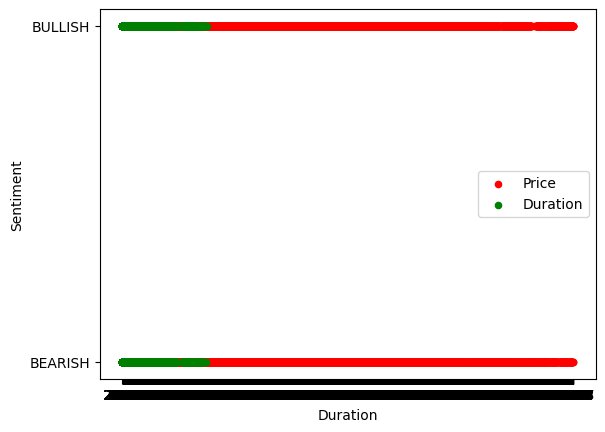

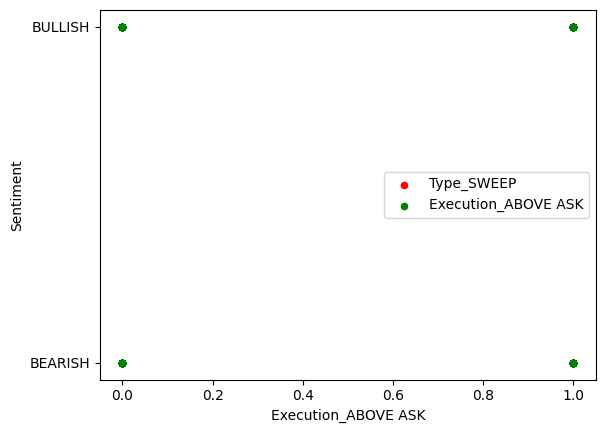

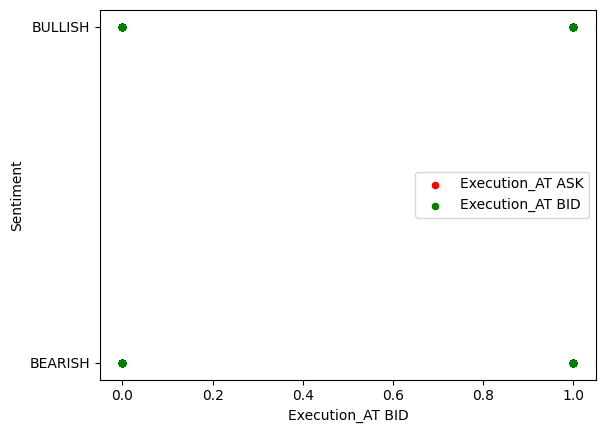

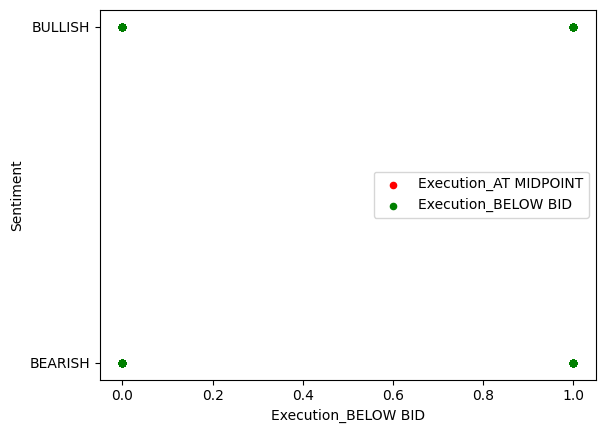

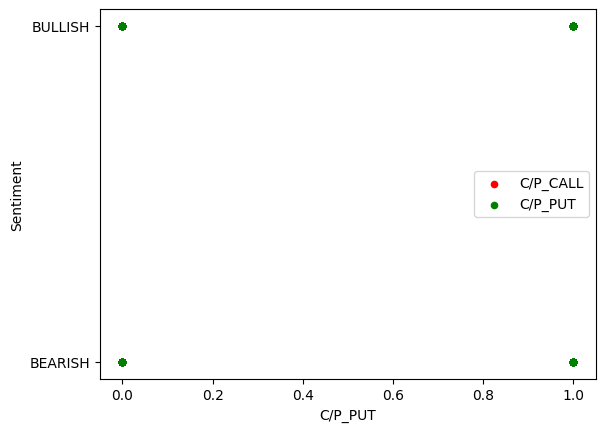

In [14]:
import matplotlib.pyplot as plt

vars = ['Strike', 'Spot', 'Open Interest', 'Size', 'Price', 'Duration', 'Type_SWEEP', 'Execution_ABOVE ASK', 'Execution_AT ASK', 'Execution_AT BID', 'Execution_AT MIDPOINT', 'Execution_BELOW BID', 'C/P_CALL', 'C/P_PUT']

# Ensure the variables list has an even number of items
if len(vars) % 2 != 0:
    vars.append(None)

for i in range(0, len(vars), 2):
    fig, ax1 = plt.subplots()

    ax1=moneyFlow.plot(kind='scatter', x=vars[i], y='Sentiment', color='r', label=vars[i], ax=ax1)

    if vars[i+1] is not None:
        ax2=moneyFlow.plot(kind='scatter', x=vars[i+1], y='Sentiment', color='g', label=vars[i+1], ax=ax1)

    plt.show()


In [12]:
vars = ['Strike', 'Spot', 'Open Interest', 'Size', 'Price', 'Duration',
       'Type_SWEEP', 'Execution_ABOVE ASK', 'Execution_AT ASK',
       'Execution_AT BID', 'Execution_AT MIDPOINT', 'Execution_BELOW BID',
       'C/P_CALL', 'C/P_PUT']
for v in range(vars):
    ax1=moneyFlow.plot(kind='scatter', x=f'{v}', y='Sentiment', color='r', label='A')

    ax2=moneyFlow.plot(kind='scatter', x=f'{v+1}', y='Sentiment', color='g', label='B', ax=ax1)

Error in callback <function flush_figures at 0x000001949C36D700> (for post_execute):


KeyboardInterrupt: 

In [9]:
sns.swarmplot(moneyFlow)

NameError: name 'sns' is not defined

In [ ]:
import matplotlib.pyplot as plt

variables = ['Strike', 'Spot', 'Open Interest', 'Size', 'Price', 'Duration', 'Type_SWEEP', 'Execution_ABOVE ASK', 'Execution_AT ASK', 'Execution_AT BID', 'Execution_AT MIDPOINT', 'Execution_BELOW BID', 'C/P_CALL', 'C/P_PUT']

for var in variables:
    plt.figure(figsize=(10, 6))
    sns.swarmplot(x=var, y="Sentiment", data=moneyFlow)
    plt.title(f'Relationship between {var} and Sentiment')
    plt.show()


KeyboardInterrupt: 

In [ ]:
import seaborn as sns
df = df.reset_index().melt('index', var_name='cols',  value_name='vals')
g = sns.catplot(x="index", y="vals", hue='cols', data=df, kind='point')
sns.relplot(data=moneyFlow, x=moneyFlow[['Strike', 'Spot', 'Open Interest', 'Size', 'Price', 'Duration',
       'Type_SWEEP', 'Execution_ABOVE ASK', 'Execution_AT ASK',
       'Execution_AT BID', 'Execution_AT MIDPOINT', 'Execution_BELOW BID',
       'C/P_CALL', 'C/P_PUT']] , y=moneyFlow["Sentiment"])


ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [ ]:

# We get the same results as below but with less work and less chance of error

#X_different = moneyFlow[list(selected_features)]

#-------------------------Data Split-------------------------#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the classifier


# You were using fit_transform for both training and testing data, this is incorrect 
# we should only fir the scaler to the training data and then transform both training and testing data using the fit
# Also maybe look at other scaling methods like MinMax 

#-------------------------Feature Scaling-------------------------#
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

#-------------------------Logisitc Regression-------------------------#
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

#-------------------------Logisitc Regression Classification Report and Confusion Matrix-------------------------#
print("Logistic Regression classification report:")
print(classification_report(y_test, lr_pred))
print("Logistic Regression confusion matrix:")
print(confusion_matrix(y_test, lr_pred))


Logistic Regression classification report:
              precision    recall  f1-score   support

     BEARISH       0.60      0.61      0.60     14943
     BULLISH       0.60      0.60      0.60     15057

    accuracy                           0.60     30000
   macro avg       0.60      0.60      0.60     30000
weighted avg       0.60      0.60      0.60     30000

Logistic Regression confusion matrix:
[[9075 5868]
 [6095 8962]]


In [ ]:

#-------------------------SGD-------------------------#
SGDC = SGDClassifier(loss="log_loss", penalty="l2", max_iter=50)
SGDC.fit(X_train, y_train)
SGDC_pred = SGDC.predict(X_test)
#-------------------------SGD Classification Report and Confusion Matrix-------------------------#
print("SGDC Confusion Matrix:")
print(confusion_matrix(y_test, SGDC_pred))
print("\nStochastic Gradient Descent Report:")
print(classification_report(y_test, SGDC_pred))


SGDC Confusion Matrix:
[[9582 5361]
 [6613 8444]]

Stochastic Gradient Descent Report:
              precision    recall  f1-score   support

     BEARISH       0.59      0.64      0.62     14943
     BULLISH       0.61      0.56      0.59     15057

    accuracy                           0.60     30000
   macro avg       0.60      0.60      0.60     30000
weighted avg       0.60      0.60      0.60     30000



In [ ]:

#-------------------------Gaussian Naive Bayes Classification-------------------------#

nn = GaussianNB()

nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)


#-------------------------Gaussian Naive Bayes Classification Report and Confusion Matrix-------------------------#
print("Gaussian Naive Bayes report:")
print(classification_report(y_test, nn_pred))
print("Gaussian Naive Bayes confusion matrix:")
print(confusion_matrix(y_test, nn_pred))


Gaussian Naive Bayes report:
              precision    recall  f1-score   support

     BEARISH       0.59      0.59      0.59     14943
     BULLISH       0.60      0.60      0.60     15057

    accuracy                           0.60     30000
   macro avg       0.60      0.60      0.60     30000
weighted avg       0.60      0.60      0.60     30000

Gaussian Naive Bayes confusion matrix:
[[8854 6089]
 [6053 9004]]


In [ ]:

# Random Forest may be too Complex and have a tendency to overfit especially if they dont have their hyperparemters optimally tuned
# Using Decision Tree Classification
#-------------------------Decision Tree Classification-------------------------#
rf = DecisionTreeClassifier(max_depth=2, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

#-------------------------A Decision Tree Classification Report and Confusion Matrix-------------------------#
print("A Decision Tree Classification Report:")
print(classification_report(y_test, rf_pred))
print("A Decision Tree confusion matrix:")
print(confusion_matrix(y_test, rf_pred))



A Decision Tree Classification Report:
              precision    recall  f1-score   support

     BEARISH       0.97      0.96      0.97     25114
     BULLISH       0.96      0.97      0.97     24936

    accuracy                           0.97     50050
   macro avg       0.97      0.97      0.97     50050
weighted avg       0.97      0.97      0.97     50050

A Decision Tree confusion matrix:
[[24135   979]
 [  688 24248]]


In [ ]:

#-------------------------Neural Netowrk-------------------------#
nn = MLPClassifier(hidden_layer_sizes=(16,),max_iter=5,alpha=10, early_stopping=True, validation_fraction=0.1, random_state=42)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)


#-------------------------Neural Network Classification Report and Confusion Matrix-------------------------#
print("Neural Network classification report:")
print(classification_report(y_test, nn_pred))
print("Neural Network confusion matrix:")
print(confusion_matrix(y_test, nn_pred))


c:\Users\JBarr\anaconda3\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network classification report:
              precision    recall  f1-score   support

     BEARISH       1.00      1.00      1.00     25114
     BULLISH       1.00      1.00      1.00     24936

    accuracy                           1.00     50050
   macro avg       1.00      1.00      1.00     50050
weighted avg       1.00      1.00      1.00     50050

Neural Network confusion matrix:
[[25114     0]
 [    0 24936]]


In [ ]:



#-------------------------KNN-------------------------#
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
#-------------------------KNN Classification Report and Confusion Matrix-------------------------#
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred))
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_pred))


KNN Confusion Matrix:
[[25109     5]
 [    5 24931]]

KNN Classification Report:
              precision    recall  f1-score   support

     BEARISH       1.00      1.00      1.00     25114
     BULLISH       1.00      1.00      1.00     24936

    accuracy                           1.00     50050
   macro avg       1.00      1.00      1.00     50050
weighted avg       1.00      1.00      1.00     50050



In [ ]:
X

,Strike,Spot,Open Interest,Size,Price,Duration,Type_SWEEP,Execution_ABOVE ASK,Execution_AT ASK,Execution_AT BID,Execution_AT MIDPOINT,Execution_BELOW BID,C/P_CALL,C/P_PUT
0,401.0,398.21,666,135,4.91,10,1,0,0,1,0,0,1,0
1,300.0,301.02,10126,798,1.4,1,1,0,1,0,0,0,0,1
2,301.0,301.02,15504,798,1.78,1,1,0,0,1,0,0,0,1
3,397.0,398.21,1003,270,3.11,1,1,0,0,1,0,0,1,0
4,299.0,301.02,5353,100,2.54,3,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183499,215.0,269.24,7229,692,4.55,164,1,0,0,1,0,0,0,1
183500,385.0,385.62,6259,219,1.15,0,1,0,0,1,0,0,0,1
183501,390.0,385.56,92984,73,9.27,17,0,0,1,0,0,0,0,1
183502,383.0,385.55,7672,35,9.38,17,0,0,0,1,0,0,1,0


In [ ]:
yfac = y.factorize()[0]
X_train, X_test, y_train, y_test = train_test_split(X, yfac, test_size=0.3, random_state=42)


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, yfac, test_size=0.3, random_state=42)

# Initialize the classifier


# You were using fit_transform for both training and testing data, this is incorrect 
# we should only fir the scaler to the training data and then transform both training and testing data using the fit
# Also maybe look at other scaling methods like MinMax 

#-------------------------Feature Scaling-------------------------#
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:



#-------------------------XGBoost-------------------------#
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

#-------------------------XGBoost Classification Report and Confusion Matrix-------------------------#
print("XGBoost classification report:")
print(classification_report(y_test, xgb_pred))
print("XGBoost confusion matrix:")
print(confusion_matrix(y_test, xgb_pred))



XGBoost classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25114
           1       1.00      1.00      1.00     24936

    accuracy                           1.00     50050
   macro avg       1.00      1.00      1.00     50050
weighted avg       1.00      1.00      1.00     50050

XGBoost confusion matrix:
[[25114     0]
 [    0 24936]]


In [ ]:

#-------------------------SVM-------------------------#
svm = SVC(C=100, kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

#-------------------------SVM Classification Report and Confusion Matrix-------------------------#
print("SVM classification report:")
print(classification_report(y_test, svm_pred))
print("SVM confusion matrix:")
print(confusion_matrix(y_test, svm_pred))